In [1]:
import kagglehub
import pandas as pd
path = kagglehub.dataset_download("bhavikjikadara/emotions-dataset")

df = pd.read_csv(f"{path}/emotions.csv")

print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


Shape of dataset: (416809, 2)
Columns: ['text', 'label']


,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
import re
import string
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

print("Unique labels:", df['label'].unique())

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"@\w+", "", text)  # remove mentions
    text = re.sub(r"#\w+", "", text)  # remove hashtags
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # remove extra spaces
    return text

df["clean_text"] = df["text"].apply(clean_text)


label_encoder = LabelEncoder()
df["label_encoded"] = label_encoder.fit_transform(df["label"])

label_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:", label_map)

X = df["clean_text"]
y = df["label_encoded"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Train label distribution:\n", np.bincount(y_train))


Unique labels: [4 0 2 1 5 3]
Label mapping: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
Train label distribution:
 [ 96949 112853  27643  45854  38170  11978]


C:\Users\Tilak Devi\AppData\Local\Temp\ipykernel_3156\2373445660.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df, order=df["label"].value_counts().index, palette="Set2")


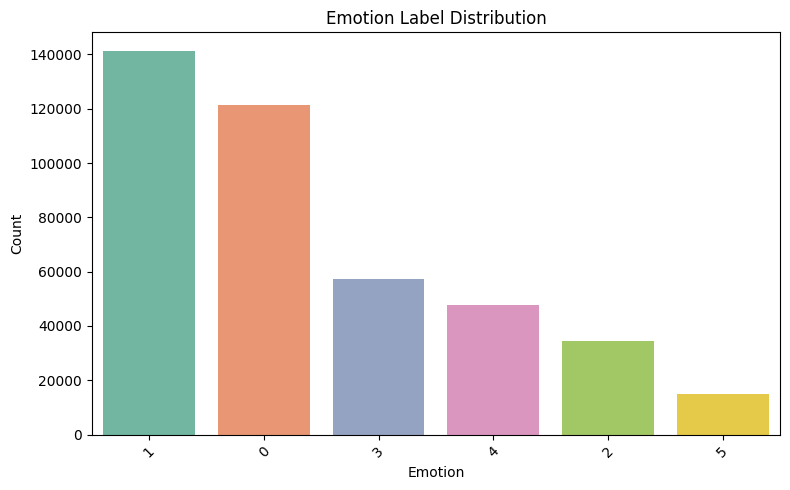


Label Counts:
label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64

Average Length of Original Texts: 97.02839669968739
Average Length of Cleaned Texts: 97.02619185286306


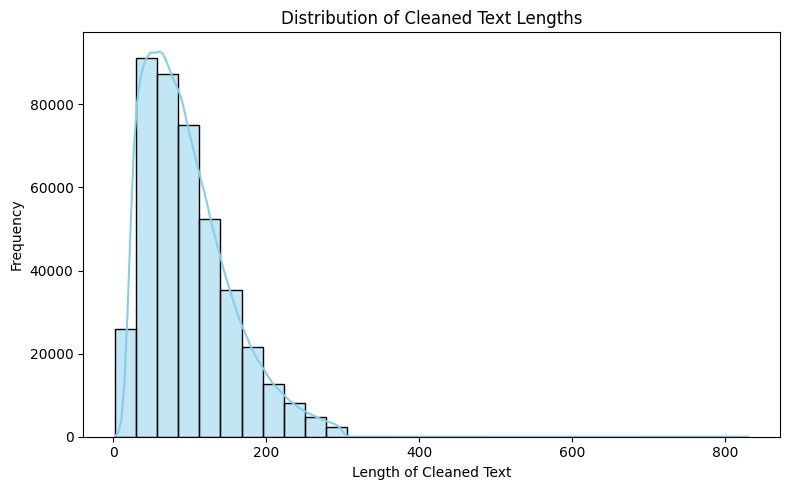

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="label", data=df, order=df["label"].value_counts().index, palette="Set2")
plt.title("Emotion Label Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display label distribution numerically
print("\nLabel Counts:")
print(df["label"].value_counts())

# Show average tweet length (before and after cleaning)
df["text_len"] = df["text"].apply(len)
df["clean_text_len"] = df["clean_text"].apply(len)

print("\nAverage Length of Original Texts:", df["text_len"].mean())
print("Average Length of Cleaned Texts:", df["clean_text_len"].mean())

# Distribution of cleaned text lengths
plt.figure(figsize=(8, 5))
sns.histplot(df["clean_text_len"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Cleaned Text Lengths")
plt.xlabel("Length of Cleaned Text")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
df_final = df[["clean_text", "label", "label_encoded"]]

# Save to CSV
df_final.to_csv("preprocessed_emotions.csv", index=False)
print(" Preprocessed dataset saved as 'preprocessed_emotions.csv'")


In [ ]:
from sklearn.preprocessing import LabelEncoder
import joblib

label_encoder = LabelEncoder()
label_encoder.fit(y)

joblib.dump(label_encoder, "label_encoder.pkl")


['label_encoder.pkl']